# Project: Credit Risk and Marketing Strategy Simulation for a Lending Product

## Importing and Cleaning the Data

In [3]:
# Importing necessary Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [4]:
# Reading the data with pandas from a CSV file 
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
# checking for duplicate data
df.duplicated().sum()

0

In [6]:
# checking for missing values in the data
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

--------------------------------------------------------------------------------------
####  checking for inconsistent data in the columns 

<Axes: xlabel='person_age'>

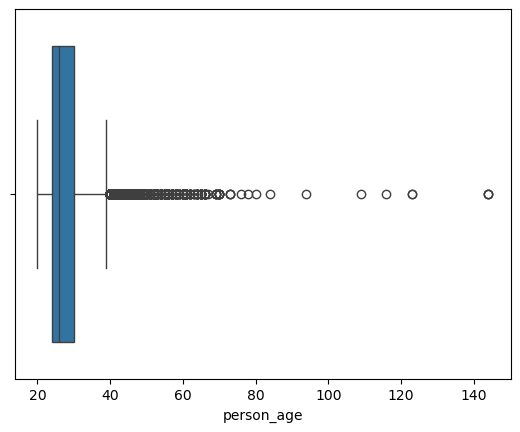

In [8]:
sns.boxplot(data = df, x= 'person_age')

In [9]:
df = df[df['person_age'] <= 75]

<Axes: xlabel='person_age'>

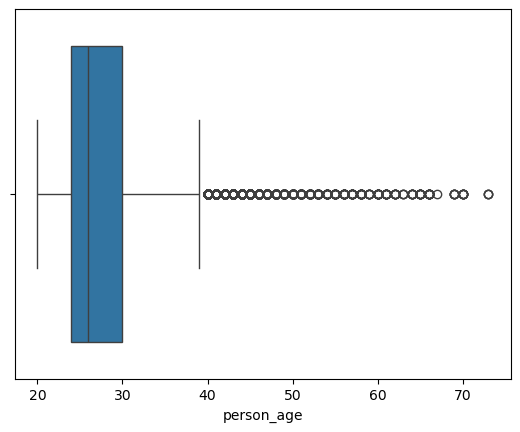

In [10]:
sns.boxplot(data = df, x= 'person_age')

In [11]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [13]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [14]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [15]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

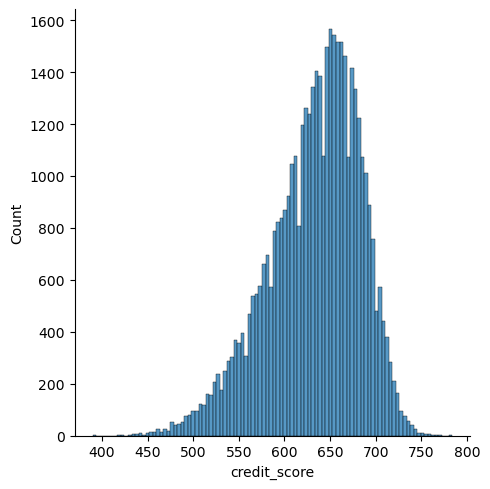

In [16]:
sns.displot(df['credit_score'])

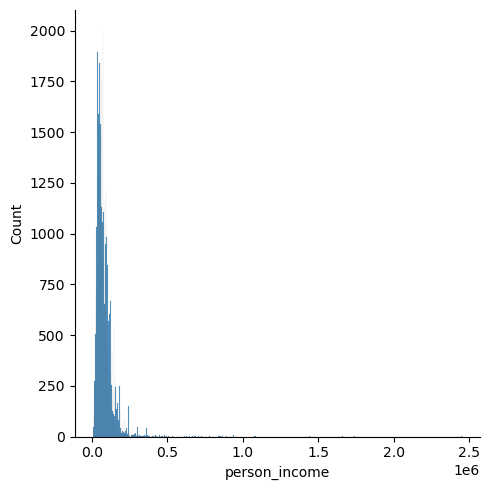

In [17]:
sns.displot(df['person_income'])

In [18]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['loan_status'].unique()

array([1, 0], dtype=int64)

In [20]:
# Checking if the data is Valid
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

<Axes: ylabel='loan_amnt'>

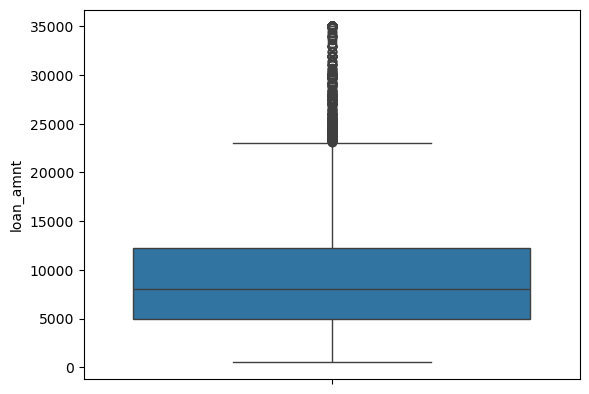

In [21]:
sns.boxplot(df['loan_amnt'])

<Axes: ylabel='person_income'>

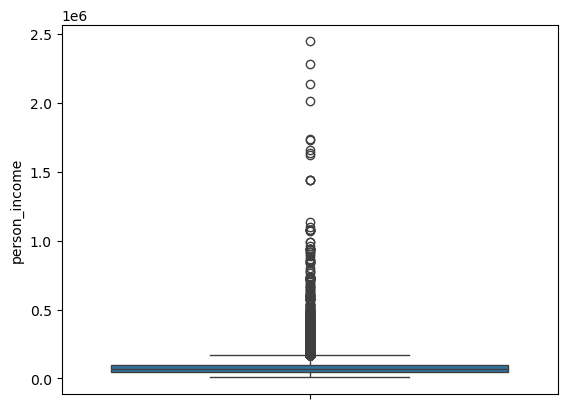

In [22]:
sns.boxplot(df['person_income'])

<Axes: ylabel='loan_int_rate'>

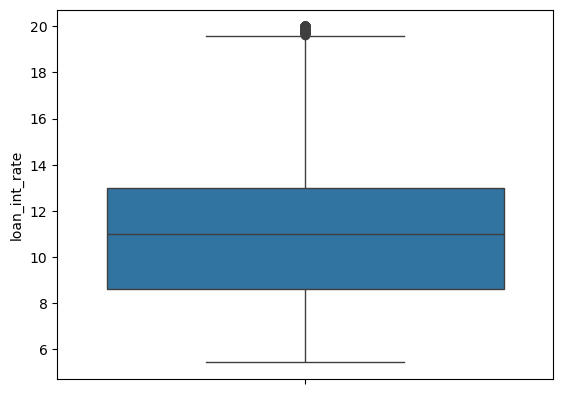

In [23]:
sns.boxplot(df['loan_int_rate'])

<Axes: ylabel='loan_percent_income'>

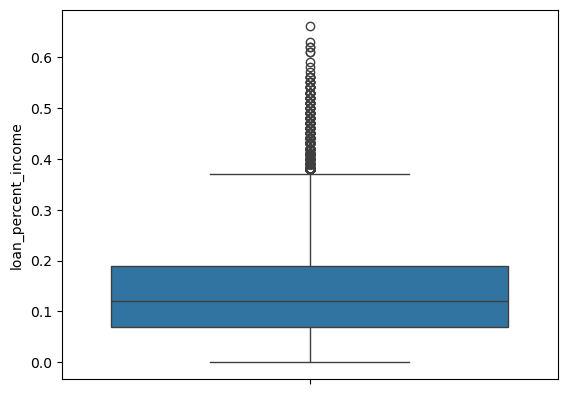

In [24]:
sns.boxplot(df['loan_percent_income'])

In [25]:
df['cb_person_cred_hist_length'].min()

2.0

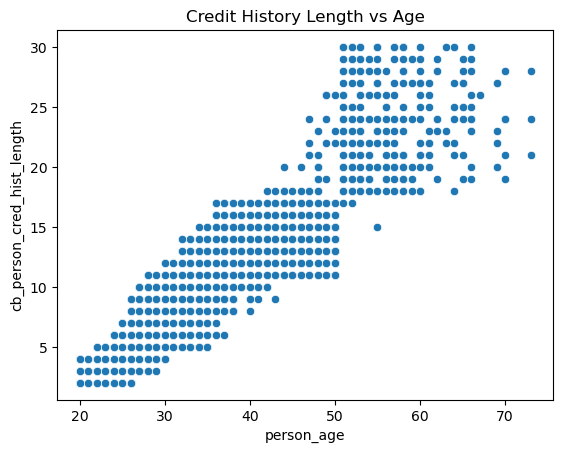

In [26]:
sns.scatterplot(x='person_age', y='cb_person_cred_hist_length', data=df)
plt.title("Credit History Length vs Age")
plt.show()

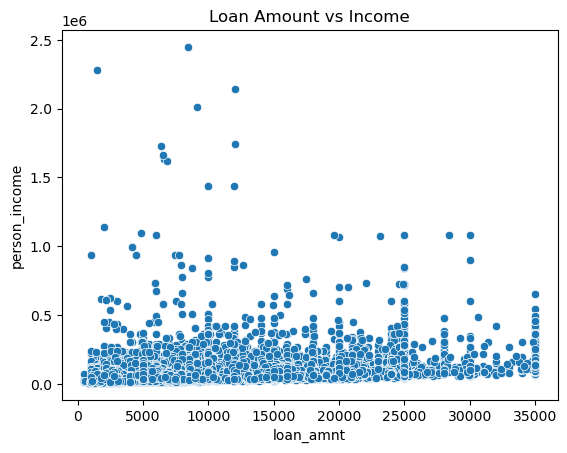

In [27]:
sns.scatterplot(x='loan_amnt', y='person_income', data=df)
plt.title("Loan Amount vs Income")
plt.show()

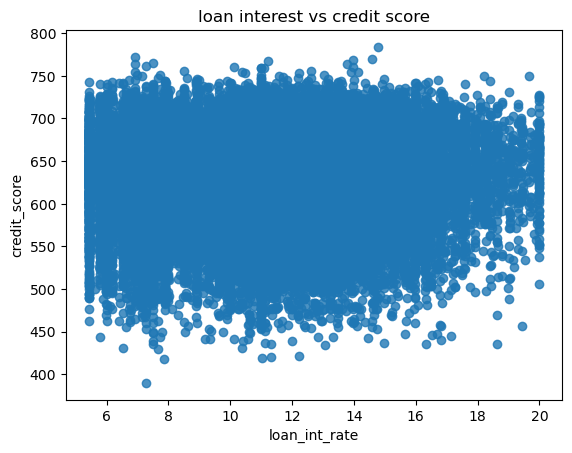

In [28]:
sns.regplot(x='loan_int_rate', y='credit_score', data=df)
plt.title("loan interest vs credit score")
plt.show()

In [29]:
df.shape

(44988, 14)

the data looks good enough, NOW we can move to next section of our project



## Data Transformation

In [32]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [33]:
# Normalizing the Data
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Select the columns to normalize
cols_to_scale = ['person_income', 'loan_amnt', 'person_age', 'credit_score']

# Fit and transform
scaled_values = scaler.fit_transform(df[cols_to_scale])

# Replace or append scaled versions to the DataFrame
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaled_values

# Optional: Preview the scaled data
print(df_scaled[cols_to_scale].describe())

       person_income     loan_amnt    person_age  credit_score
count   4.498800e+04  4.498800e+04  4.498800e+04  4.498800e+04
mean   -1.086631e-16  7.581144e-17 -3.045883e-16  3.045883e-16
std     1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00
min    -1.135570e+00 -1.438390e+00 -1.316400e+00 -4.813991e+00
25%    -5.166243e-01 -7.257923e-01 -6.362965e-01 -6.265884e-01
50%    -2.031383e-01 -2.507273e-01 -2.962450e-01  1.473865e-01
75%     2.506141e-01  4.202625e-01  3.838580e-01  7.427518e-01
max     3.740675e+01  4.024858e+00  7.694966e+00  3.005140e+00


In [34]:
df_scaled.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.976348,female,Master,-0.125719,0,RENT,4.024858,PERSONAL,16.02,0.49,3.0,-1.420409,No,1
1,-1.146374,female,High School,-1.067950,0,OWN,-1.359212,EDUCATION,11.14,0.08,2.0,-2.551603,Yes,0
2,-0.466271,female,High School,-1.065486,3,MORTGAGE,-0.646615,MEDICAL,12.87,0.44,3.0,0.048159,No,1
3,-0.806322,female,Bachelor,-0.002465,0,RENT,4.024858,MEDICAL,15.23,0.44,2.0,0.841979,No,1
4,-0.636296,male,Master,-0.217517,1,RENT,4.024858,MEDICAL,14.27,0.53,4.0,-0.924271,No,1


In [35]:
df_scaled['loan_status'].value_counts()

loan_status
0    34988
1    10000
Name: count, dtype: int64

In [36]:
#checking Data Types
df_scaled.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                      float64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [37]:
# Binning Essential Variables
bins = [0, 10, 15, 20]
labels = ['Low', 'Medium', 'High']
df_scaled['int_rate_bin'] = pd.cut(df_scaled['loan_int_rate'], bins=bins, labels=labels)

In [38]:
bins = [0, 2, 5, 10, 20, 50]
labels = ['<2yr', '2–5yr', '5–10yr', '10–20yr', '20yr+']
df_scaled['emp_exp_bin'] = pd.cut(df_scaled['person_emp_exp'], bins=bins, labels=labels, include_lowest=True)

In [39]:
# Encode Categorical Varibles
df_encoded = df_scaled.copy()
categorical_cols = ['person_education','loan_intent', 'person_home_ownership','int_rate_bin','emp_exp_bin','previous_loan_defaults_on_file']
df_encoded = pd.get_dummies(df_scaled, columns=categorical_cols, drop_first=True)

In [40]:
df_encoded

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,int_rate_bin_Medium,int_rate_bin_High,emp_exp_bin_2–5yr,emp_exp_bin_5–10yr,emp_exp_bin_10–20yr,emp_exp_bin_20yr+,previous_loan_defaults_on_file_Yes
0,-0.976348,female,-0.125719,0,4.024858,16.02,0.49,3.0,-1.420409,1,...,False,False,True,False,True,False,False,False,False,False
1,-1.146374,female,-1.067950,0,-1.359212,11.14,0.08,2.0,-2.551603,0,...,False,True,False,True,False,False,False,False,False,True
2,-0.466271,female,-1.065486,3,-0.646615,12.87,0.44,3.0,0.048159,1,...,False,False,False,True,False,True,False,False,False,False
3,-0.806322,female,-0.002465,0,4.024858,15.23,0.44,2.0,0.841979,1,...,False,False,True,False,True,False,False,False,False,False
4,-0.636296,male,-0.217517,1,4.024858,14.27,0.53,4.0,-0.924271,1,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126219,male,-0.504358,6,0.857758,15.66,0.31,3.0,0.246614,1,...,False,False,True,False,True,False,True,False,False,False
44996,1.574038,female,-0.222807,17,-0.092372,14.07,0.14,11.0,-0.229678,1,...,False,False,True,True,False,False,False,True,False,False
44997,0.893935,male,-0.362690,7,-1.078766,10.02,0.05,10.0,0.703061,1,...,False,False,True,True,False,False,True,False,False,False
44998,0.213832,male,-0.738187,4,0.382693,13.23,0.36,6.0,-0.567052,1,...,False,False,True,True,False,True,False,False,False,False


## Exploratory Data Analysis

In [42]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44988 entries, 0 to 44999
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          44988 non-null  float64
 1   person_gender                       44988 non-null  object 
 2   person_income                       44988 non-null  float64
 3   person_emp_exp                      44988 non-null  int64  
 4   loan_amnt                           44988 non-null  float64
 5   loan_int_rate                       44988 non-null  float64
 6   loan_percent_income                 44988 non-null  float64
 7   cb_person_cred_hist_length          44988 non-null  float64
 8   credit_score                        44988 non-null  float64
 9   loan_status                         44988 non-null  int64  
 10  person_education_Bachelor           44988 non-null  bool   
 11  person_education_Doctorate          44988 non-

In [43]:
df_encoded.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,4.498800e+04,4.498800e+04,44988.000000,4.498800e+04,44988.000000,44988.000000,44988.000000,4.498800e+04,44988.000000
mean,-3.045883e-16,-1.086631e-16,5.388148,7.581144e-17,11.006634,0.139738,5.864408,3.045883e-16,0.222281
std,1.000011e+00,1.000011e+00,5.896067,1.000011e+00,2.979042,0.087209,3.872007,1.000011e+00,0.415784
min,-1.316400e+00,-1.135570e+00,0.000000,-1.438390e+00,5.420000,0.000000,2.000000,-4.813991e+00,0.000000
25%,-6.362965e-01,-5.166243e-01,1.000000,-7.257923e-01,8.590000,0.070000,3.000000,-6.265884e-01,0.000000
50%,-2.962450e-01,-2.031383e-01,4.000000,-2.507273e-01,11.010000,0.120000,4.000000,1.473865e-01,0.000000
75%,3.838580e-01,2.506141e-01,8.000000,4.202625e-01,12.990000,0.190000,8.000000,7.427518e-01,0.000000
max,7.694966e+00,3.740675e+01,50.000000,4.024858e+00,20.000000,0.660000,30.000000,3.005140e+00,1.000000


In [44]:
df_encoded.shape

(44988, 29)

In [45]:
df['person_income'].mean()

79909.0657064106

In [46]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9151
MEDICAL              8544
VENTURE              7815
PERSONAL             7550
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

count    44988.000000
mean      9583.323820
std       6314.994983
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: xlabel='loan_amnt', ylabel='Count'>

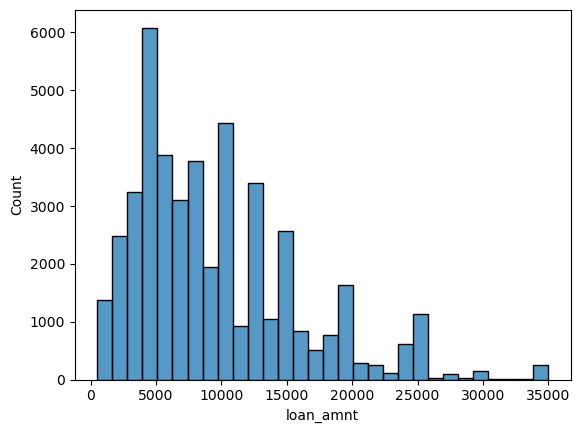

In [47]:
# Univariate analysis


print(df.loan_amnt.describe())
sns.histplot(df['loan_amnt'], bins = 30)

count    4.498800e+04
mean     7.990907e+04
std      6.332489e+04
min      8.000000e+03
25%      4.719425e+04
50%      6.704550e+04
75%      9.577900e+04
max      2.448661e+06
Name: person_income, dtype: float64


<Axes: xlabel='person_income', ylabel='Count'>

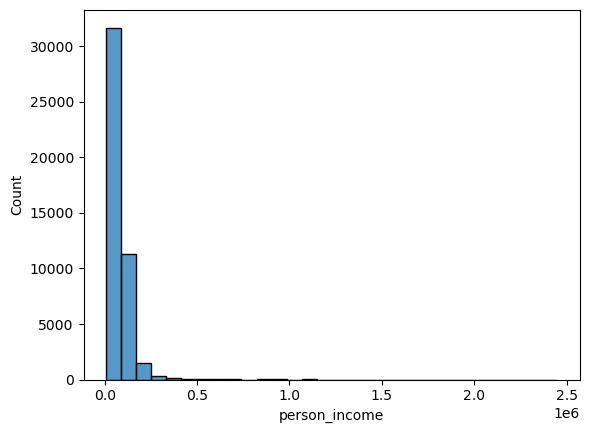

In [48]:
print(df.person_income.describe())
sns.histplot(df['person_income'], bins = 30)

count    44988.000000
mean       632.573308
std         50.389790
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        784.000000
Name: credit_score, dtype: float64


<Axes: xlabel='credit_score', ylabel='Count'>

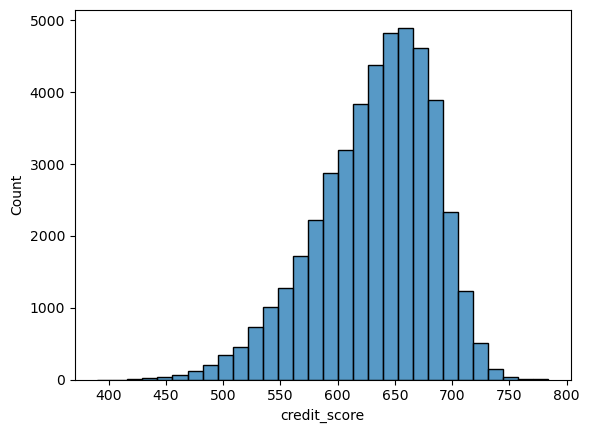

In [49]:
print(df.credit_score.describe())
sns.histplot(df['credit_score'], bins = 30)

count    44988.000000
mean        11.006634
std          2.979042
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


<Axes: xlabel='loan_int_rate', ylabel='Count'>

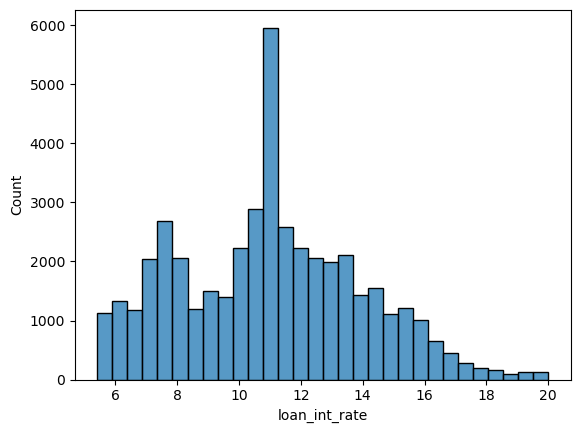

In [50]:
print(df.loan_int_rate.describe())
sns.histplot(df['loan_int_rate'], bins = 30)

In [51]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.777719
1    0.222281
Name: proportion, dtype: float64

,person_income,loan_amnt
person_income,1.000000,0.312431
loan_amnt,0.312431,1.000000


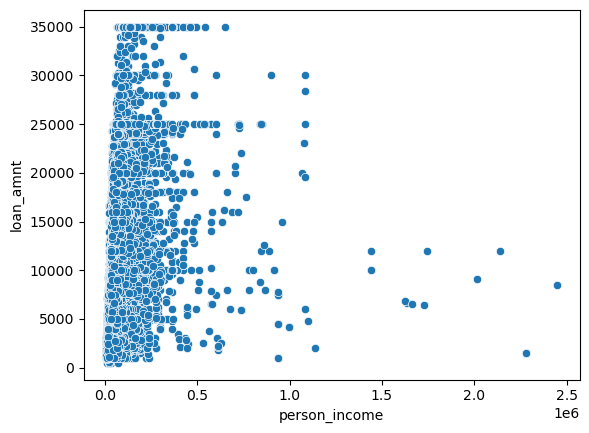

In [52]:
import seaborn as sns
sns.scatterplot(data=df, x='person_income', y='loan_amnt')
df[['person_income', 'loan_amnt']].corr()

<Axes: xlabel='loan_status', ylabel='person_income'>

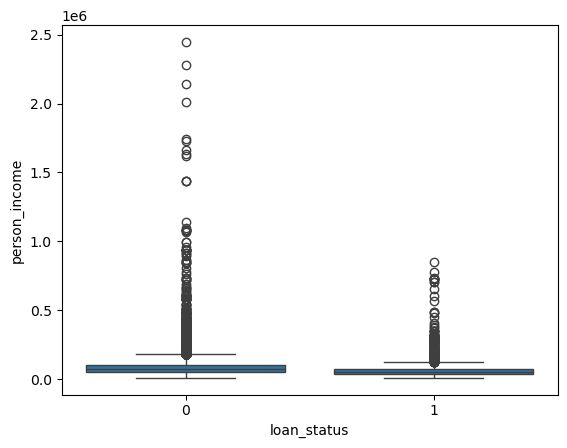

In [53]:
sns.boxplot(x='loan_status', y='person_income', data=df)

<Axes: xlabel='loan_intent', ylabel='count'>

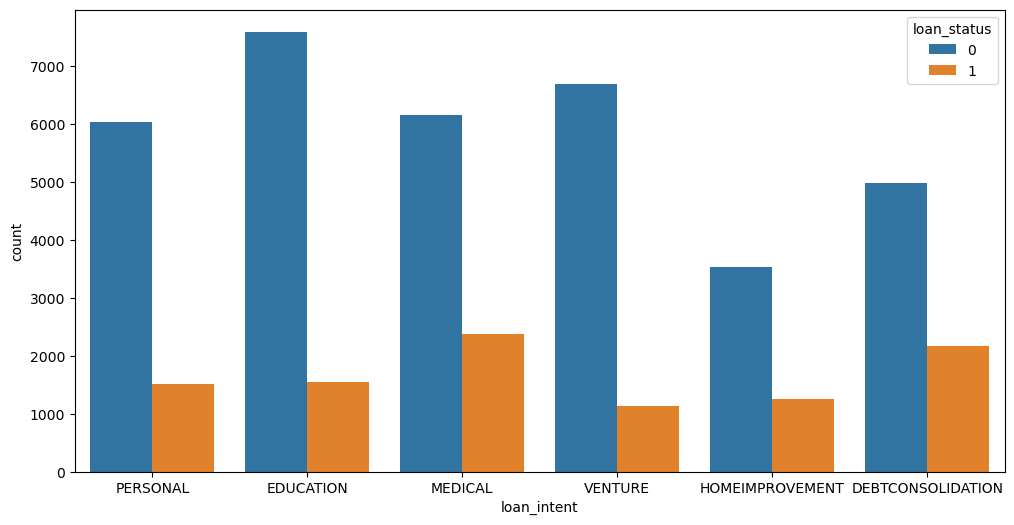

In [54]:
plt.figure(figsize = (12,6))
pd.crosstab(df['loan_status'], df['loan_intent'], normalize='index')
sns.countplot(x='loan_intent', hue='loan_status', data=df)

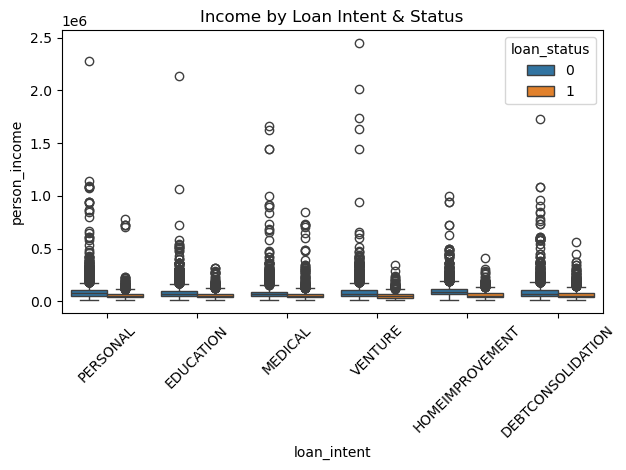

In [55]:
import seaborn as sns

sns.boxplot(x='loan_intent', y='person_income', hue='loan_status', data=df)
plt.xticks(rotation=45)
plt.title('Income by Loan Intent & Status')
plt.tight_layout()
plt.show()

<Axes: xlabel='person_income', ylabel='loan_amnt'>

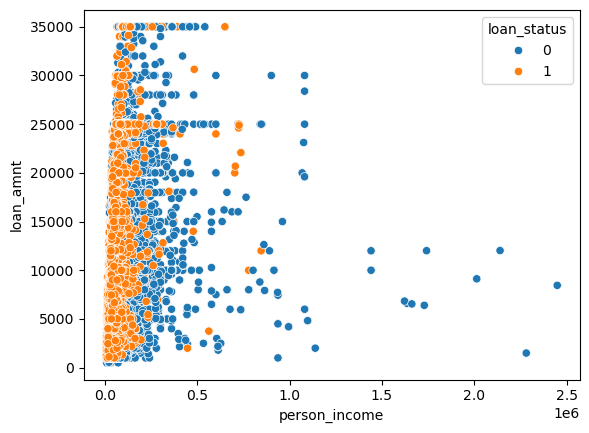

In [56]:
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status')

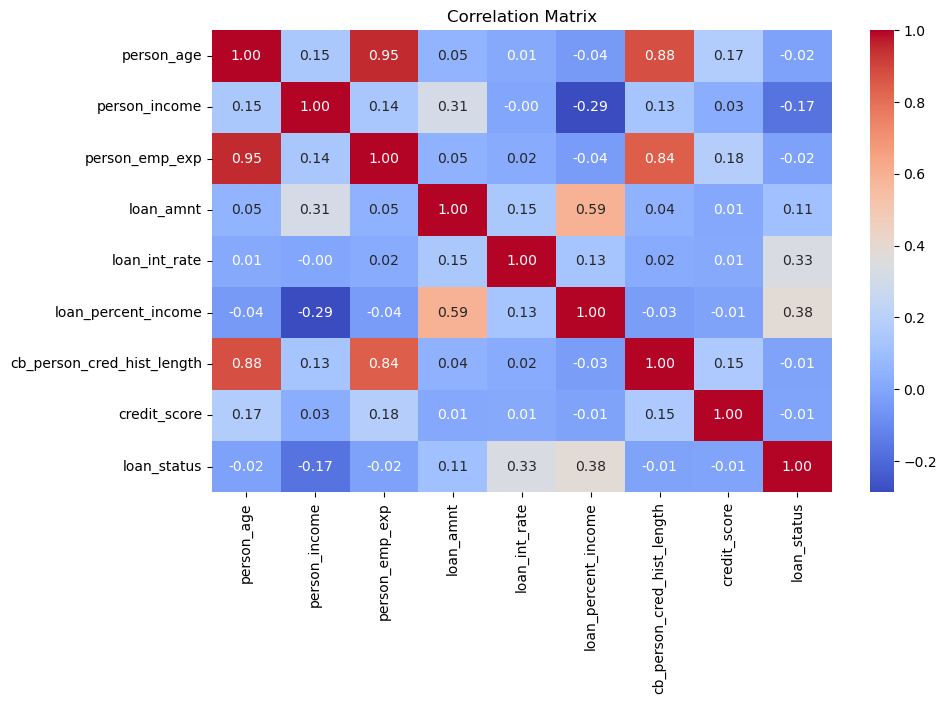

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [58]:
df['person_income'].min()

8000.0

## Model Preparation

In [60]:
# Final Data Validation
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44988 entries, 0 to 44999
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          44988 non-null  float64
 1   person_gender                       44988 non-null  object 
 2   person_income                       44988 non-null  float64
 3   person_emp_exp                      44988 non-null  int64  
 4   loan_amnt                           44988 non-null  float64
 5   loan_int_rate                       44988 non-null  float64
 6   loan_percent_income                 44988 non-null  float64
 7   cb_person_cred_hist_length          44988 non-null  float64
 8   credit_score                        44988 non-null  float64
 9   loan_status                         44988 non-null  int64  
 10  person_education_Bachelor           44988 non-null  bool   
 11  person_education_Doctorate          44988 non-

In [61]:
df_encoded.columns

Index(['person_age', 'person_gender', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'loan_status',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'int_rate_bin_Medium',
       'int_rate_bin_High', 'emp_exp_bin_2–5yr', 'emp_exp_bin_5–10yr',
       'emp_exp_bin_10–20yr', 'emp_exp_bin_20yr+',
       'previous_loan_defaults_on_file_Yes'],
      dtype='object')

In [62]:
df_final = df_encoded[['person_age', 'person_income','loan_amnt','loan_percent_income','cb_person_cred_hist_length','credit_score', 'loan_status',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT','person_emp_exp', 'loan_int_rate',
       'previous_loan_defaults_on_file_Yes']]

In [63]:
#Splitting the Dataset
X = df_final.drop(['loan_status'], axis = 1 )
y = df_final['loan_status']

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.40, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.50, random_state=42, stratify=y_temp)

In [64]:
X_train.shape

(26992, 21)

In [65]:
X_val.shape

(8998, 21)

In [66]:
X_test.shape

(8998, 21)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

lr_model = LogisticRegression(max_iter= 1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
#evaluating model on the validation dataset
print('Evaluation on the Validation Data')
y_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Evaluation on the Validation Data
Accuracy: 90.05%
Confusion Matrix:
 [[6601  397]
 [ 498 1502]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      6998
           1       0.79      0.75      0.77      2000

    accuracy                           0.90      8998
   macro avg       0.86      0.85      0.85      8998
weighted avg       0.90      0.90      0.90      8998



In [69]:
#training Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
print('Evaluation on the Validation Data')
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Evaluation on the Validation Data
Accuracy: 92.93%
Confusion Matrix:
 [[6833  165]
 [ 471 1529]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6998
           1       0.90      0.76      0.83      2000

    accuracy                           0.93      8998
   macro avg       0.92      0.87      0.89      8998
weighted avg       0.93      0.93      0.93      8998



In [71]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [72]:
print('Evaluation on the Validation Data')
y_pred = xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Evaluation on the Validation Data
Accuracy: 93.35%
Confusion Matrix:
 [[6811  187]
 [ 411 1589]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6998
           1       0.89      0.79      0.84      2000

    accuracy                           0.93      8998
   macro avg       0.92      0.88      0.90      8998
weighted avg       0.93      0.93      0.93      8998



Here we are doing Hyperparameter Tuning using GridSearchCV

In [74]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# # Initialize the XGBClassifier
# xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # Define parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1, 0.3],
#     'scale_pos_weight': [1, 3, 5]  # adjust based on class imbalance ratio
# }

# # Setup GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb_clf,
#     param_grid=param_grid,
#     scoring='f1',   # or 'roc_auc' if preferred
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )

# # Fit grid search
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best F1 Score:", grid_search.best_score_)


In [75]:
xgb = XGBClassifier(colsample_bytree = 1.0, gamma = 0.1, learning_rate = 0.1, max_depth = 7, n_estimators = 200, scale_pos_weight = 1, subsample = 0.8)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [76]:
print('Evaluation on the Validation Data after hyperparameter tuning')
y_pred = xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Evaluation on the Validation Data after hyperparameter tuning
Accuracy: 93.58%
Confusion Matrix:
 [[6826  172]
 [ 406 1594]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6998
           1       0.90      0.80      0.85      2000

    accuracy                           0.94      8998
   macro avg       0.92      0.89      0.90      8998
weighted avg       0.93      0.94      0.93      8998



The model is now generating acceptable results
and now we are going to train it on the training and val data set and then test it with test data


In [78]:
#Combining the X_train and X_val

X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)

In [79]:
xgb.fit(X_full,y_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [80]:
print('Evaluation on the testing Data after combining training and validation datasets')
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Evaluation on the testing Data after combining training and validation datasets
Accuracy: 93.25%
Confusion Matrix:
 [[6803  195]
 [ 412 1588]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6998
           1       0.89      0.79      0.84      2000

    accuracy                           0.93      8998
   macro avg       0.92      0.88      0.90      8998
weighted avg       0.93      0.93      0.93      8998



<Axes: >

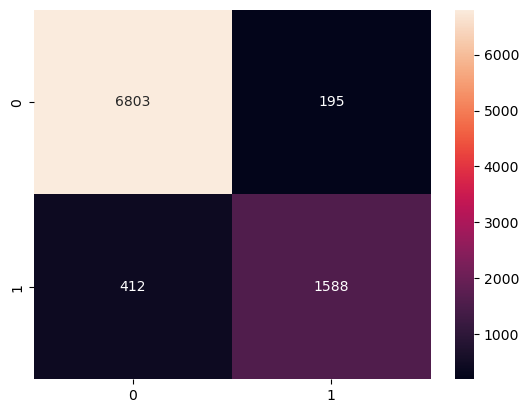

In [297]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')

In [81]:
from sklearn.metrics import roc_auc_score
y_probs = xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.979421549014004


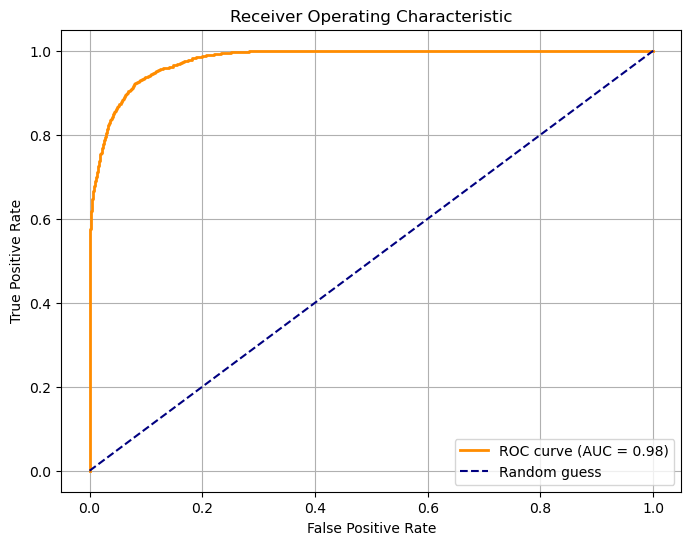

In [305]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})", color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="navy", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

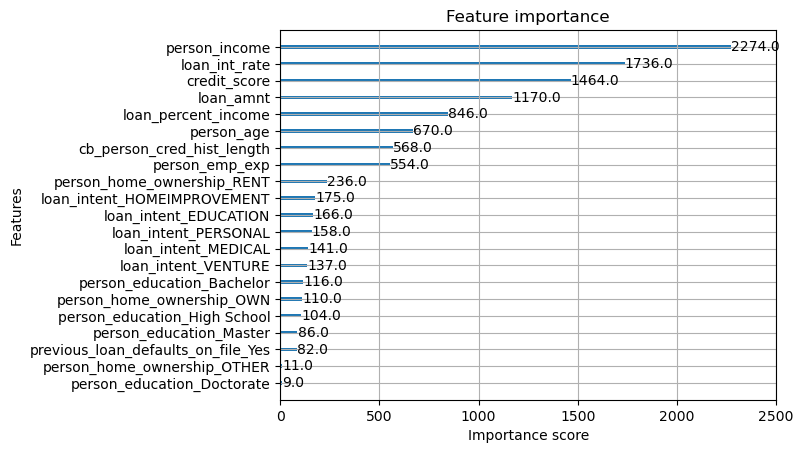

In [82]:
from xgboost import XGBClassifier, plot_importance

plot_importance(xgb)
plt.show()

now that Prediction model is done, we are going to make a clustering model with K-means Clustering

### Clustering Model: clustering people to recognize potential marketing strategies

features we are going to use are :

person_income

loan_int_rate

credit_score

loan_amnt

loan_percent_income

person_age

cb_person_cred_hist_length

person_emp_exp

In [86]:
X_cluster = df[['person_income','loan_int_rate','credit_score','loan_amnt','loan_percent_income',
              'person_age','cb_person_cred_hist_length','person_emp_exp']]

In [87]:
X_cluster

,person_income,loan_int_rate,credit_score,loan_amnt,loan_percent_income,person_age,cb_person_cred_hist_length,person_emp_exp
0,71948.0,16.02,561,35000.0,0.49,22.0,3.0,0
1,12282.0,11.14,504,1000.0,0.08,21.0,2.0,0
2,12438.0,12.87,635,5500.0,0.44,25.0,3.0,3
3,79753.0,15.23,675,35000.0,0.44,23.0,2.0,0
4,66135.0,14.27,586,35000.0,0.53,24.0,4.0,1
...,...,...,...,...,...,...,...,...
44995,47971.0,15.66,645,15000.0,0.31,27.0,3.0,6
44996,65800.0,14.07,621,9000.0,0.14,37.0,11.0,17
44997,56942.0,10.02,668,2771.0,0.05,33.0,10.0,7
44998,33164.0,13.23,604,12000.0,0.36,29.0,6.0,4


In [88]:
X_cluster_scaled = scaler.fit_transform(X_cluster)
X_cluster_scaled

array([[-0.12571919,  1.68289746, -1.42040884, ..., -0.976348  ,
        -0.73978171, -0.91386481],
       [-1.06794995,  0.04476873, -2.55160294, ..., -1.14637375,
        -0.99804856, -0.91386481],
       [-1.06548643,  0.62549879,  0.04815893, ..., -0.46627073,
        -0.73978171, -0.40504537],
       ...,
       [-0.36269024, -0.33119524,  0.70306078, ...,  0.89393532,
         1.06808625,  0.27338055],
       [-0.73818655,  0.74634436, -0.56705189, ...,  0.21383229,
         0.03501885, -0.23543889],
       [-0.44690766,  2.02865004, -0.09075964, ..., -0.63629649,
        -0.73978171, -0.74425833]])

<Axes: >

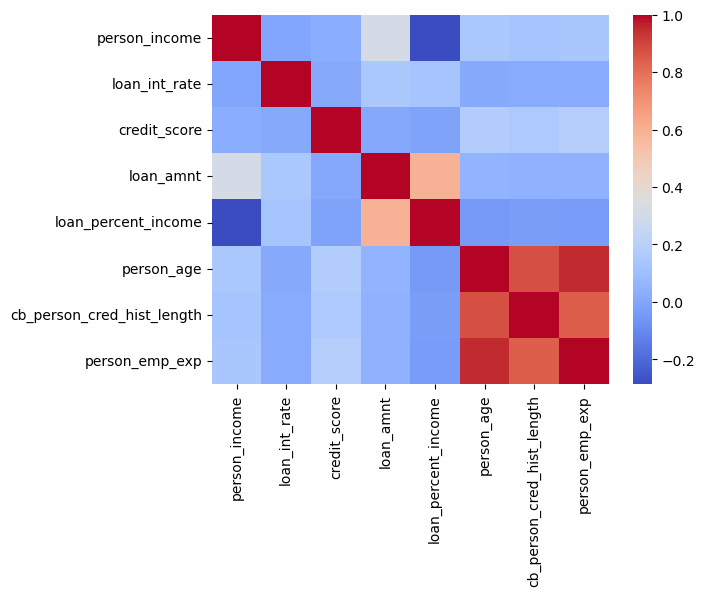

In [89]:
sns.heatmap(X_cluster.corr(), annot=False, cmap='coolwarm')

In [90]:
# CLustering Model
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters= 3, random_state = 42)
kmeans.fit(X_cluster_scaled)

KMeans(n_clusters=3, random_state=42)

In [92]:
kmeans.labels_

array([2, 0, 2, ..., 0, 2, 0])

In [93]:
df['Cluster'] = kmeans.labels_

In [94]:
kmeans_labels = kmeans.labels_

#### Model Evaluation

In [210]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_cluster_scaled,kmeans_labels)
print(f'Silhoutte Score: {sil_score}')

Silhoutte Score: 0.21483482861555356


as we can see here that silhouette score is not good we are using PCA with 0.95 n_components to select the minimum number of principal components that together explain 95% of the variance

In [180]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_cluster_scaled)

In [182]:
X_pca

array([[-1.61407873,  5.96493722,  0.04866773,  0.99012254,  0.58662571,
        -0.04496546],
       [-2.32140511, -1.3501687 , -0.66896237,  1.76204501,  1.52237236,
        -0.07217964],
       [-1.19912321,  2.0386261 , -2.18282331, -0.06062076, -0.05392928,
         1.93100308],
       ...,
       [ 1.28351656, -1.56252292, -0.52969953, -0.43356228, -0.146838  ,
        -0.0122311 ],
       [-0.24271658,  2.15345097, -1.3592745 ,  0.50873239,  0.39479002,
         0.97585552],
       [-1.2565378 ,  0.19798106, -0.35361106, -1.08318919,  1.76685937,
         0.04641309]])

In [184]:
kmeans = KMeans(n_clusters= 3, random_state = 42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [186]:
kmeans_labels = kmeans.labels_

In [188]:
df['Cluster'] = kmeans.labels_

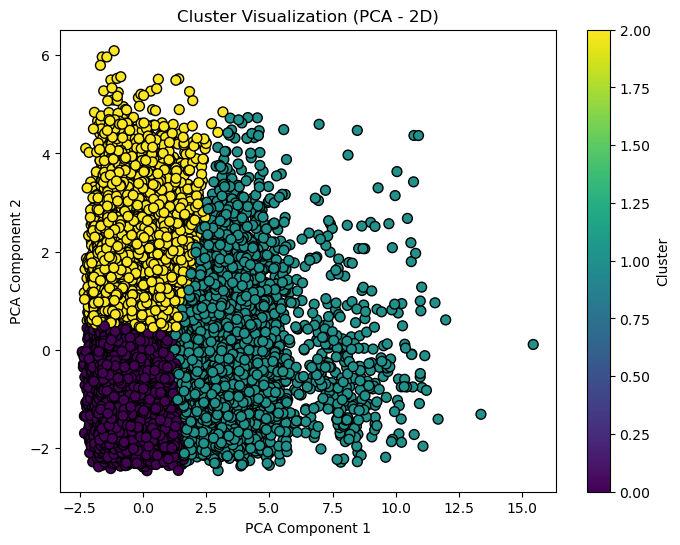

In [193]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Cluster Visualization (PCA - 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

We are seeing that k-means here is not able to handle the clusters and the clusters are overlapping even after doin PCA so we are now 
we will use different algo like Gaussian Mixture Models GMM

In [196]:
#Using GMM now
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)

# Step 3: Predict cluster labels
labels = gmm.predict(X_pca)

# Step 4 (Optional): Get probabilities
probs = gmm.predict_proba(X_pca)

In [255]:
scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_pca)
    
    sil_score = silhouette_score(X_pca, labels)
    bic_score = gmm.bic(X_pca)
    aic_score = gmm.aic(X_pca)
    
    scores.append((k, sil_score, bic_score, aic_score))
    print(f"K={k} | Silhouette={sil_score:.4f} | BIC={bic_score:.0f} | AIC={aic_score:.0f}")

K=2 | Silhouette=0.2349 | BIC=676996 | AIC=676517
K=3 | Silhouette=0.1456 | BIC=637596 | AIC=636872
K=4 | Silhouette=0.0881 | BIC=614865 | AIC=613898
K=5 | Silhouette=0.0479 | BIC=604412 | AIC=603200
K=6 | Silhouette=0.0430 | BIC=595305 | AIC=593850
K=7 | Silhouette=0.0520 | BIC=585949 | AIC=584250
K=8 | Silhouette=0.0666 | BIC=581763 | AIC=579819
K=9 | Silhouette=0.0573 | BIC=576745 | AIC=574557


In [198]:
labels

array([2, 0, 2, ..., 0, 2, 0], dtype=int64)

In [200]:
df['Cluster'] = labels

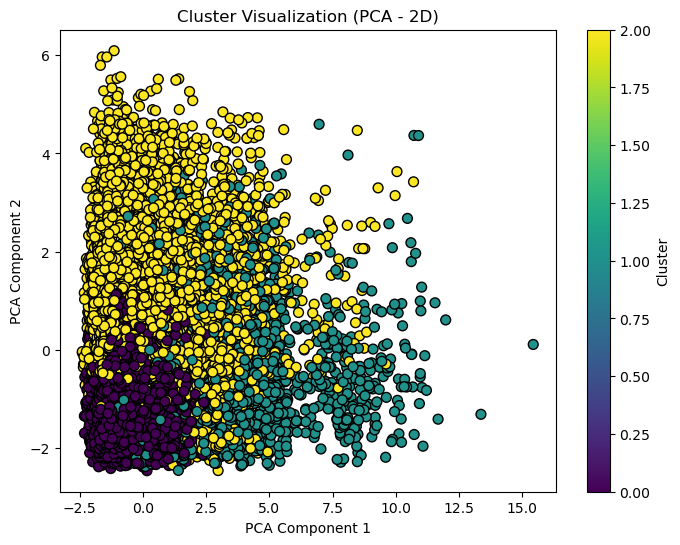

In [202]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Cluster Visualization (PCA - 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

As we can see not even with Gaussian Mixture Models the clusters are still very ambiguous (Silhouette Score is Very low and lowering when the no. of clusters is Increasing)

So We can say that this also not able to differentiate the clusters

Key Takeaway<br>
Clustering is useful only when natural segments exist. In financial datasets with gradual customer differences, rule-based segmentation often outperforms algorithmic clustering in business value.

Now We are going to do business segments instead of algorithmic clustering so

In [257]:
# Create income segments
df['income_segment'] = pd.cut(df['person_income'],
                              bins=[0, 80000,  df['person_income'].max()],
                              labels=['Low Income', 'High Income'])

# Create credit score segments
df['credit_segment'] = pd.cut(df['credit_score'],
                              bins=[0, 500, 700, df['credit_score'].max()],
                              labels=['Poor Credit', 'Average Credit', 'Excellent Credit'])

df['loan_purpose_segment'] = df['loan_intent']

# Combine into a single business segment column if needed
df['business_segment'] = df['income_segment'].astype(str) + '_' + df['credit_segment'].astype(str) + '_' + df['loan_purpose_segment'].astype(str)


In [259]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9151
MEDICAL              8544
VENTURE              7815
PERSONAL             7550
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [261]:
segment_counts = df['business_segment'].value_counts()
print(segment_counts)

business_segment
Low Income_Average Credit_MEDICAL                 5633
Low Income_Average Credit_EDUCATION               5480
Low Income_Average Credit_VENTURE                 4528
Low Income_Average Credit_PERSONAL                4409
Low Income_Average Credit_DEBTCONSOLIDATION       4246
High Income_Average Credit_EDUCATION              3021
High Income_Average Credit_VENTURE                2736
High Income_Average Credit_PERSONAL               2595
High Income_Average Credit_DEBTCONSOLIDATION      2416
Low Income_Average Credit_HOMEIMPROVEMENT         2320
High Income_Average Credit_MEDICAL                2292
High Income_Average Credit_HOMEIMPROVEMENT        2095
Low Income_Excellent Credit_MEDICAL                363
Low Income_Excellent Credit_PERSONAL               288
Low Income_Excellent Credit_EDUCATION              277
Low Income_Excellent Credit_VENTURE                266
Low Income_Excellent Credit_DEBTCONSOLIDATION      256
High Income_Excellent Credit_EDUCATION          

These are our segments now based on rule based segmentation

In [263]:
#Predicting Probability on the Final Dataset
df_test = df_final.drop(['loan_status'], axis = 1)

In [265]:
# Get probabilities for the positive class (default)
df['predicted_risk'] = xgb.predict_proba(df_test)[:,1]
df['predicted_risk']

0        0.998909
1        0.000301
2        0.999372
3        0.998576
4        0.998769
           ...   
44995    0.998534
44996    0.880153
44997    0.172761
44998    0.999257
44999    0.972503
Name: predicted_risk, Length: 44988, dtype: float32

In [267]:
segment_summary = df.groupby('business_segment').agg(
    count=('predicted_risk', 'count'),
    avg_risk=('predicted_risk', 'mean')
).sort_values(by='avg_risk', ascending=False)

print(segment_summary)

                                                count  avg_risk
business_segment                                               
Low Income_Poor Credit_HOMEIMPROVEMENT             34  0.411251
Low Income_Average Credit_HOMEIMPROVEMENT        2320  0.394084
Low Income_Average Credit_DEBTCONSOLIDATION      4246  0.357020
Low Income_Poor Credit_MEDICAL                     69  0.343991
Low Income_Average Credit_MEDICAL                5633  0.330665
Low Income_Excellent Credit_DEBTCONSOLIDATION     256  0.328964
Low Income_Excellent Credit_MEDICAL               363  0.312580
Low Income_Excellent Credit_PERSONAL              288  0.302327
Low Income_Excellent Credit_HOMEIMPROVEMENT       160  0.280478
Low Income_Poor Credit_DEBTCONSOLIDATION           50  0.279671
Low Income_Average Credit_PERSONAL               4409  0.265848
High Income_Poor Credit_MEDICAL                    24  0.243867
High Income_Poor Credit_DEBTCONSOLIDATION          24  0.243025
Low Income_Excellent Credit_EDUCATION   

In [273]:
segment_summary

,count,avg_risk
business_segment,,
Low Income_Poor Credit_HOMEIMPROVEMENT,34,0.411251
Low Income_Average Credit_HOMEIMPROVEMENT,2320,0.394084
Low Income_Average Credit_DEBTCONSOLIDATION,4246,0.357020
Low Income_Poor Credit_MEDICAL,69,0.343991
Low Income_Average Credit_MEDICAL,5633,0.330665
Low Income_Excellent Credit_DEBTCONSOLIDATION,256,0.328964
Low Income_Excellent Credit_MEDICAL,363,0.312580
Low Income_Excellent Credit_PERSONAL,288,0.302327
Low Income_Excellent Credit_HOMEIMPROVEMENT,160,0.280478


In [307]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,Cluster,income_segment,credit_segment,loan_purpose_segment,business_segment,predicted_risk
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,2,Low Income,Average Credit,PERSONAL,Low Income_Average Credit_PERSONAL,0.998909
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0,Low Income,Average Credit,EDUCATION,Low Income_Average Credit_EDUCATION,0.000301
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,2,Low Income,Average Credit,MEDICAL,Low Income_Average Credit_MEDICAL,0.999372
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,2,Low Income,Average Credit,MEDICAL,Low Income_Average Credit_MEDICAL,0.998576
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,2,Low Income,Average Credit,MEDICAL,Low Income_Average Credit_MEDICAL,0.998769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,2,Low Income,Average Credit,MEDICAL,Low Income_Average Credit_MEDICAL,0.998534
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,2,Low Income,Average Credit,HOMEIMPROVEMENT,Low Income_Average Credit_HOMEIMPROVEMENT,0.880153
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,0,Low Income,Average Credit,DEBTCONSOLIDATION,Low Income_Average Credit_DEBTCONSOLIDATION,0.172761
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,2,Low Income,Average Credit,EDUCATION,Low Income_Average Credit_EDUCATION,0.999257
